In [1]:
import pandas as pd
import seaborn as sns
import statistics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/ArtemkaDS/sberbank_data_analysis/master/data/titanic/train.csv')

In [3]:
ds.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Проверим на наличие выбросов

In [4]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


И на наличие пропусков

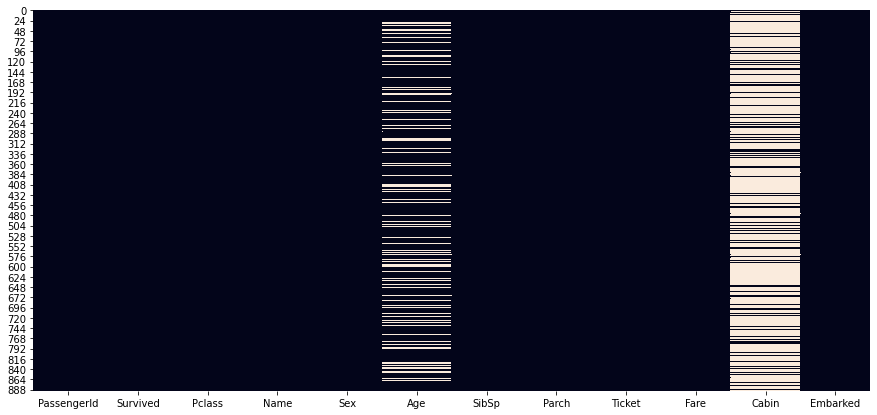

In [5]:
figure(figsize=(15,7))
sns.heatmap(ds.isnull(), cbar=False)
plt.show()

Избавимся от пропусков (каюты заполним следующими валидными значениями, а возраст - самыми частыми (возьмем моду)

In [6]:
ds.Cabin.fillna(method='bfill', inplace = True)

In [7]:
ds.Age.fillna(statistics.mode(ds.Age), inplace = True)

In [8]:
ds.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,E46,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,G6,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,G6,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C


In [9]:
ds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Проверим пару незбитых теорий со возможными несколькими перекрестными зависимостями, например теорию с родственниками

## 1. Влияло ли по разному на выживаемость мужчин и женщин наличие каких-либо родственников?

In [10]:
ds['kin'] = ds['SibSp'] + ds['Parch']

In [11]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,kin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,0


In [12]:
ds['kin'] = ds.kin.astype(bool)
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,kin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,False


In [13]:
series = ds.groupby(['Sex', 'kin'])['Survived'].sum() / ds.groupby(['Sex', 'kin'])['Survived'].count()
df = pd.DataFrame([series])
df

Sex         female                male          
kin          False     True      False     True 
Survived  0.785714  0.712766  0.155718  0.271084

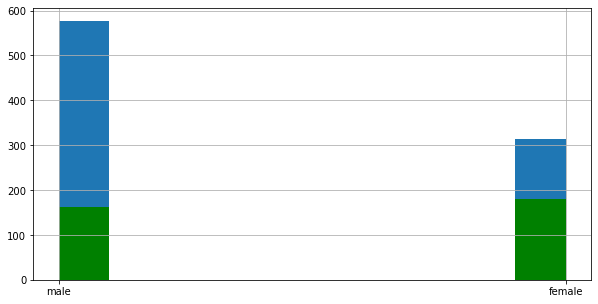

In [14]:
ds.Sex.hist(figsize=(10, 5))
ax = ds[ds['Survived'] == 1].kin.hist(color='g', grid=True)

Видим, что женщин без родственников выжило больше, чем с ними. Для мужчин ситуация противоположная. Вероятно, женщины в большей степени, нежели мужчины, пытались спасать своих родственников, даже с риском для жизни. Либо просто в силу физической слабости попытки спасения родственников не увенчались успехом настолько же, насколько у мужчин, у которых это получалось статистически больше. 

## 2. Как повлияло на выживаемость наличие каких-либо родственников для людей разных возрастов?

In [15]:
series = ds.groupby(['Age', 'kin', 'PassengerId'])['Survived'].sum() / ds.groupby(['Age', 'kin'])['Survived'].count()
series

Age    kin    PassengerId
0.42   True   804            1.0
0.67   True   756            1.0
0.75   True   470            0.5
              645            0.5
0.83   True   79             0.5
                            ... 
70.50  False  117            0.0
71.00  False  97             0.0
              494            0.0
74.00  False  852            0.0
80.00  False  631            1.0
Name: Survived, Length: 891, dtype: float64

In [16]:
df = pd.DataFrame([series])
dft = df.transpose()
dft = dft.sort_values(by='PassengerId')

In [17]:
ds['Survived_weight'] = dft['Survived'].values
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,kin,Survived_weight
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,True,0.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,0.250000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,False,0.083333
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,0.200000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S,False,0.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False,0.055556
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,C148,S,True,0.000000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False,0.083333


In [33]:
dft = dft.sort_values(by='Survived',ascending=False)
dft.reset_index(inplace=True)
dft.head(30)

,index,Age,kin,PassengerId,Survived
0,0,0.67,True,756,1.000000
1,7,80.00,False,631,1.000000
2,1,0.92,True,306,1.000000
3,12,13.00,True,447,1.000000
4,11,53.00,True,572,1.000000
5,10,63.00,True,276,1.000000
6,8,12.00,True,126,1.000000
7,9,32.50,False,124,1.000000
8,6,0.42,True,804,1.000000
9,5,5.00,False,778,1.000000


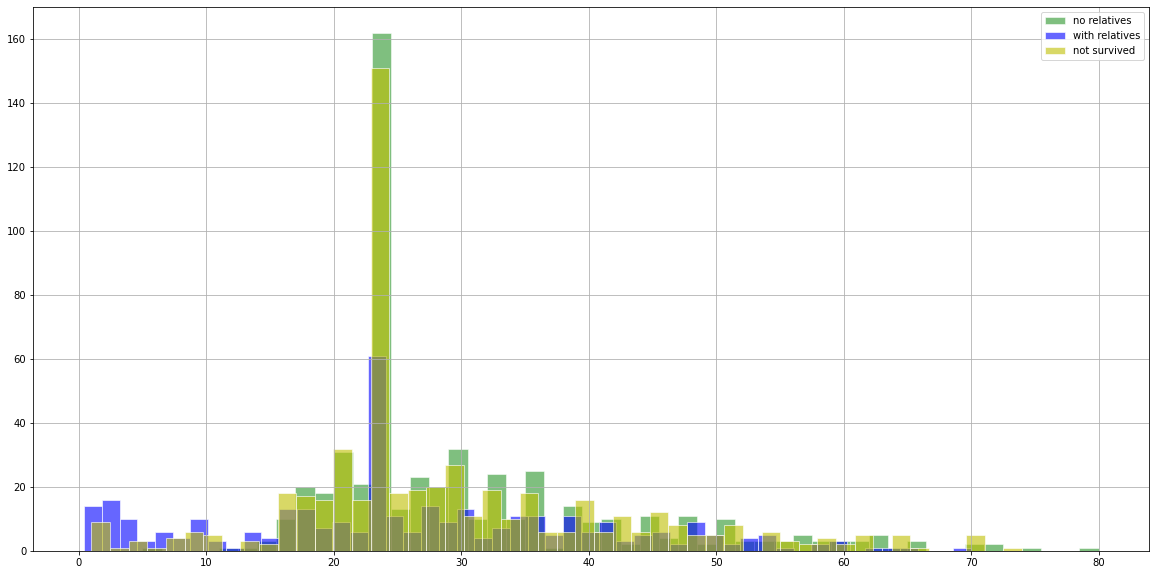

In [19]:
ax = ds[ds['kin'] == False]['Age'].hist(figsize=(20, 10), bins=50, edgecolor='white', grid=True, color='g', alpha=0.5)

ds[ds['kin'] == True]['Age'].hist(figsize=(20, 10), bins=50, edgecolor='white', color='b', alpha=0.6)
ds[ds['Survived'] == 0]['Age'].hist(figsize=(20, 10), bins=50, 
                                          edgecolor='white', color='y',alpha=0.6)
ax.legend(['no relatives', 'with relatives', 'not survived'])
plt.show()

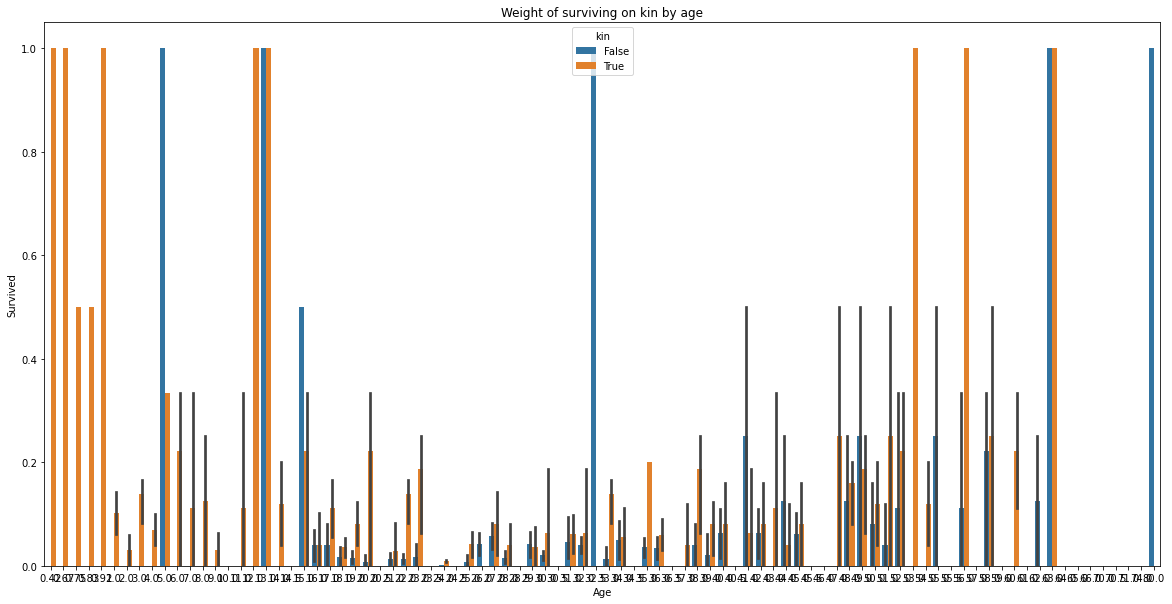

In [35]:
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=dft, x='Age', y='Survived', hue='kin')
ax.set(title="Weight of surviving on kin by age")

plt.show()

Видим, что пассажиры до 15 лет почти все были c родственниками и погибших среди них не так много. В среднем возрасте пассажиров без родственников выжило чуть больше, после 50 же чаще выживали пассажиры с родственниками.